In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
from sklearn.cluster import KMeans
import os
import clean_data

import us_state_abbrev as usa
import sys
sys.path.append('../')
import us_boundaries as usb

In [2]:
# Input desired states by their 2 letter abbreviation in all caps
states = ["CO","UT","NV","CA","AZ","NM"]
# Force regenerate data
regenerate_data = False

In [3]:
# alphebetize the list of states for consistency
states = sorted(states)
state_names = [usa.abbrev_to_us_state[x] for x in states]

In [4]:
data_file = "data/" + "_".join(map(lambda x: x.lower(), states)) + '.pickle'

# scrape and save data if file isn't saved
if not regenerate_data and not os.path.exists(data_file):
    print("+".join(states) + " combined data not found...scraping data into folder")
    clean_data.save_data(states)

# open data file
with open(data_file, 'rb') as handle:
    d = pickle.load(handle)

## K Means

In [5]:
# use k-means, and find the cluster centers
print("Cluster Centers for " + "+".join(states) + " combined:")
km = KMeans(n_clusters=5,n_init='auto').fit(d['all_data'][:,2:]);
print(km.cluster_centers_)  # without lat lon coord as "features"

Cluster Centers for AZ+CA+CO+NM+NV+UT combined:
[[ 0.3240026   0.09991962  0.86691902  0.640453  ]
 [ 0.11012294  0.1137814   0.89727618  0.44692651]
 [ 0.58880417  0.12639546  0.78855342  0.60848711]
 [ 0.03233348  0.13459403 -8.18852459  0.43958795]
 [ 0.39649931  0.09091605  0.82868227  0.4767006 ]]


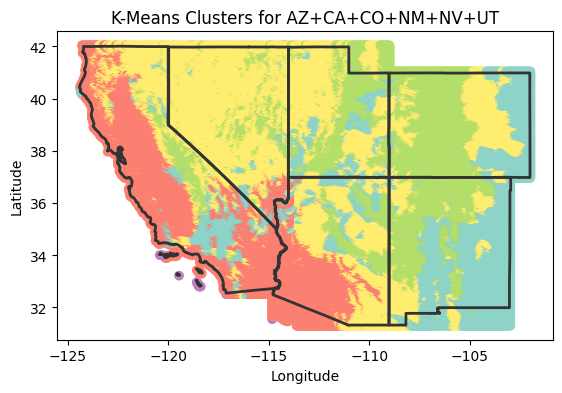

In [6]:
# plot the cluster of a specific (long,lat) coordinate
fig,ax = plt.subplots()
ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_title("K-Means Clusters for " + "+".join(states));

lon = np.round(d['lon'],2).flatten()  # x
lat = np.round(d['lat'],2).flatten()  # y
ax.scatter(lon,lat,c=km.labels_,cmap='Set3');

# draw state boundaries
for state_name in state_names:
    usb.draw_state(ax, state_name, edgecolor='#333')

# savefile image name (or None, to not save) for the k-means clustering
savefile = "figs/" + "_".join(map(lambda x: x.lower(), states)) + "_kmeans.png"
if savefile:  # save if filename is given
    plt.savefig(savefile,dpi=300);